Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading CSV directly via Google Colaboratory
df = pd.read_csv('https://blog.sanbercode.com/wp-content/uploads/2020/05/austin_weather.csv')
#df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

In [ ]:
# Preparing data

## replace '-' with NaN
df = df.replace('-', np.nan)

## fill NaN with ffill method
df = df.fillna(method='ffill')

## change data type of selected columns
df = df.astype({
    'DewPointAvgF': 'float64',
    'HumidityAvgPercent': 'float64',
    'WindAvgMPH': 'float64'
})

## display dataframe's info to check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1319 non-null   object 
 5   DewPointAvgF                1319 non-null   float64
 6   DewPointLowF                1319 non-null   object 
 7   HumidityHighPercent         1319 non-null   object 
 8   HumidityAvgPercent          1319 non-null   float64
 9   HumidityLowPercent          1319 non-null   object 
 10  SeaLevelPressureHighInches  1319 non-null   object 
 11  SeaLevelPressureAvgInches   1319 non-null   object 
 12  SeaLevelPressureLowInches   1319 non-null   object 
 13  VisibilityHighMiles         1319 

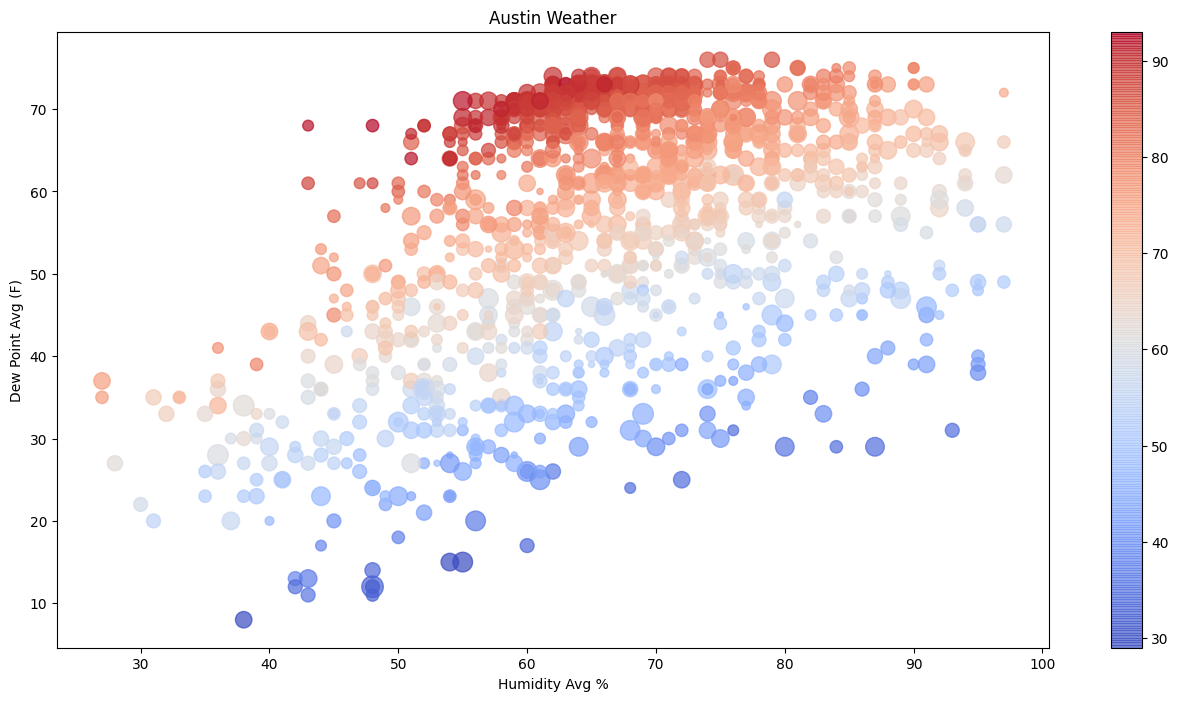

In [ ]:
# Visualization
plt.style.use('default')

## define subplots & figure size
fig, ax = plt.subplots(figsize=(16, 8))

## create scatter plot
asct = ax.scatter(
    df['HumidityAvgPercent'], df['DewPointAvgF'], 
    c=df['TempAvgF'], s=df['WindAvgMPH']*20, 
    cmap=plt.cm.coolwarm, alpha=0.7
)

## set figure's title and x-y label
ax.set_title('Austin Weather', fontsize='large')
ax.set_xlabel('Humidity Avg %', fontsize='medium')
ax.set_ylabel('Dew Point Avg (F)', fontsize='medium')

## draw color bar
plt.colorbar(asct)

## show the plot
plt.show()

**Insight:**

*Scatter plot* yang dihasilkan tersebut menunjukkan sebaran data **cuaca di Austin** yang sangat beragam dan penyebaran data yang sangat luas. Namun dapat terlihat secara samar sebuah pola yang terbentuk, yaitu **semakin tinggi persentase rata-rata kelembapan udara** (*humidity average*, diwakili dengan kolom `HumidityAvgPercent` sebagai sumbu x atau horizontal), **maka temperatur rata-rata titik embun** (*dew point average*, diwakili dengan kolom `DewPointAvgF` sebagai sumbu y atau vertikal) **akan semakin tinggi**, seiring juga dengan kenaikan temperatur udara rata-rata (*temperature average*, diwakili dengan kolom `TempAvgF` yang diperlihatkan dalam *color map* setiap titik data).

Ditemukan pula pola bahwa antara tingkat kelembapan udara 50% hingga 80%, terdapat banyak data dimana titik embun dengan temperatur lebih tinggi dan kecepatan angin yang tinggi pula. *Wind* diwakili oleh kolom `WindAvgMPH` yang membentuk ukuran lingkaran tiap titik data, sehingga semakin besar lingkaran yang terbentuk, semakin besar pula tingkat kecepatan udara yang terukur. Perlu pengolahan data lebih lanjut untuk menarik berbagai korelasi dan kesimpulan yang lainnya

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading CSV directly via Google Colaboratory
df = pd.read_csv('https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv')
#df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [ ]:
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

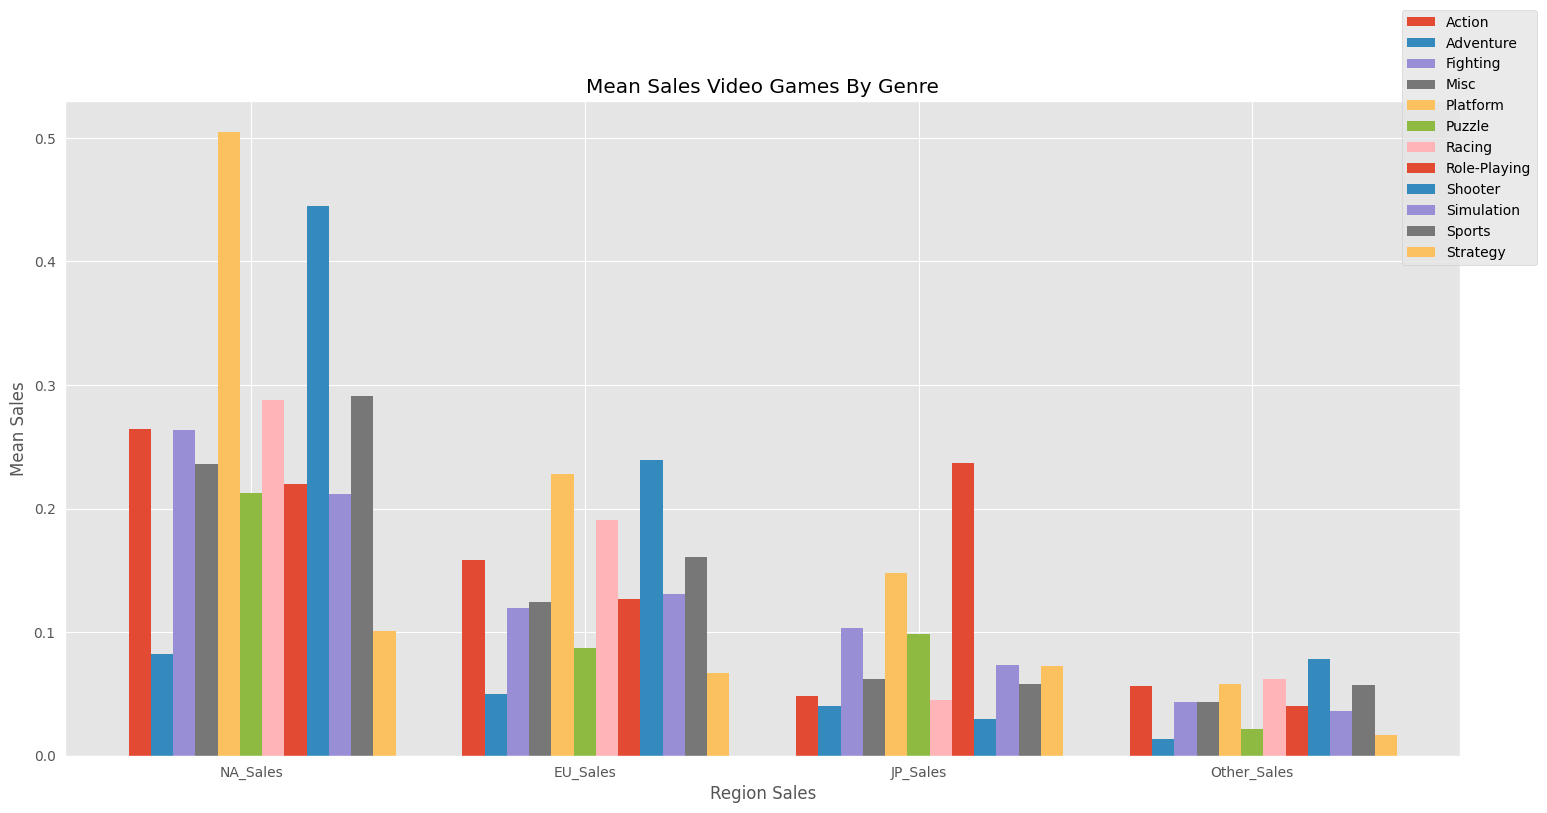

In [ ]:
import numpy as np

## set color scheme
plt.style.use('ggplot')

## define subplots & figure size
fig, ax = plt.subplots(figsize=(18, 8.5), facecolor='w')

## plot the bars
cols = np.arange(len(genre_sales.columns))
width = 1 / (len(genre_sales.index) + 3)
for n, iv in enumerate(genre_sales.index.values):
    x = cols + (n * width)
    ax.bar(x, genre_sales.loc[iv], width=width, label=iv)

## set axis ticks
ax.set_xticks(cols + (width * len(genre_sales.index) / 2) - width)
ax.set_xticklabels(genre_sales.columns)
ax.tick_params(axis='both', which='both', bottom=False, left=False)

## place the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.06, 1.15), frameon=True)

## set figure's title and x-y label
ax.set_title('Mean Sales Video Games By Genre')
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')

## show the plot
plt.show()

**Jawab:**

Dari visualisasi yang disajikan, ditunjukkan hasil rata-rata penjualan *video games* berdasarkan *genre* yang berbeda-beda dari berbagai regional. Dengan data rata-rata penjualan tersebut, bisa disimpulkan *genre* mana yang lebih diminati oleh pemain *video games* pada suatu regional.

Pada regional **NA (North America)** misalnya, video games dengan *genre platform* lebih merajai daripada *genre* yang lainnya. *Genre* yang paling sedikit menghasilkan keuntungan disana adalah *genre adventure* (petualangan).

*Genre shooter* (tembak-tembakan) paling banyak menghasilkan untung di pasar **EU (Europe)** sedangkan *genre adventure* kurang menguntungkan di area tersebut.

*Genre role-playing* (bermain peran) jauh sangat digandrungi oleh pasar **JP (Jepang)** ketimbang yang lain. Sedangkan *genre shooter* kurang menjual di regional tersebut.

Pada area selain ketiga regional tersebut (selain NA, EU dan JP), didapatkan bahwa *video games* dengan *genre shooter* lebih banyak terjual sedangkan yang paling sedikit adalah *video games* dengan *genre adventure*.

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

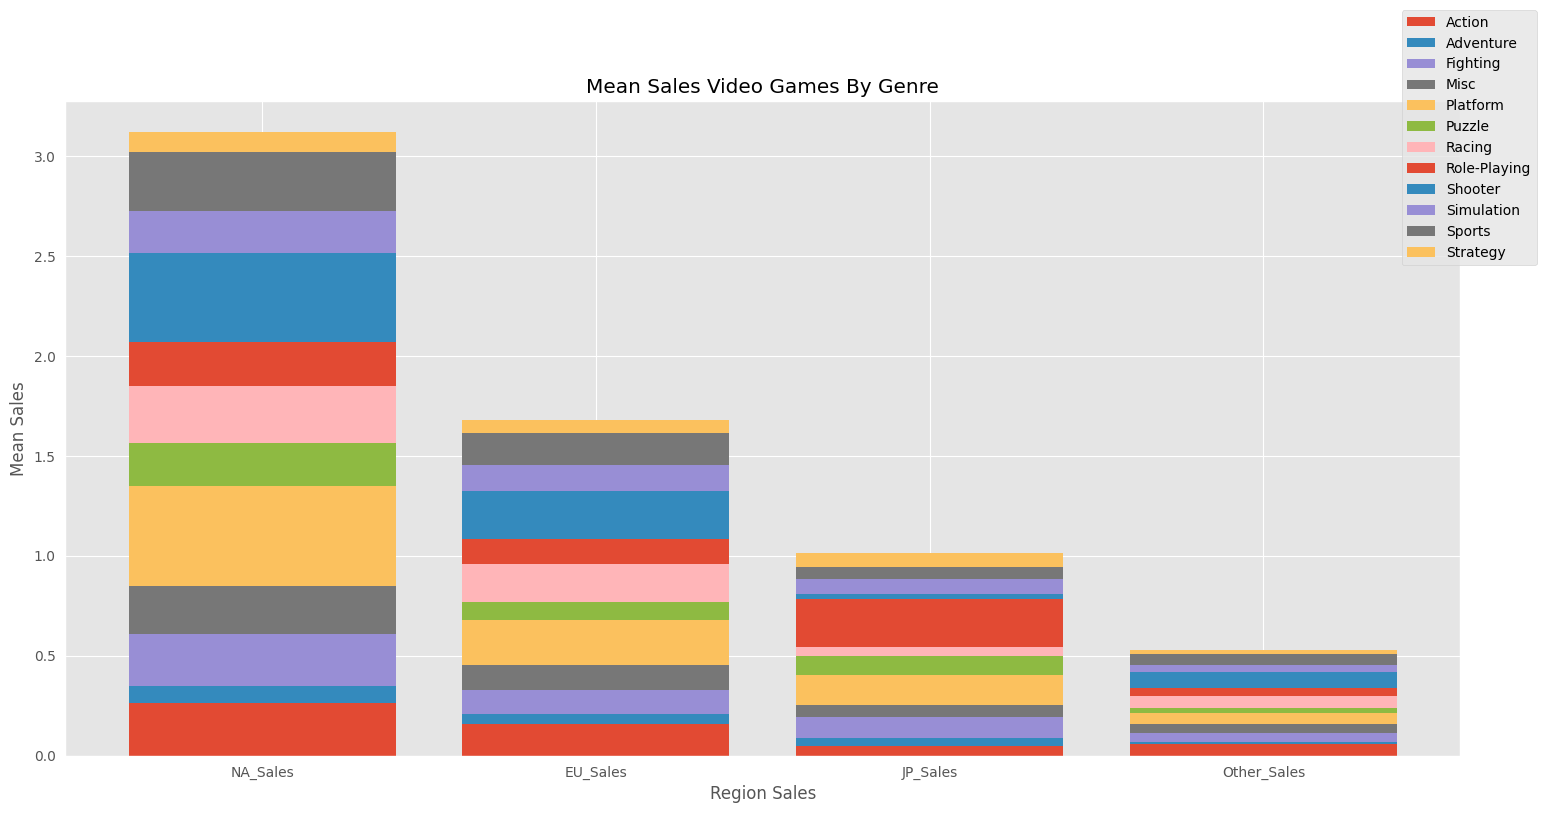

In [ ]:
import numpy as np

## set color scheme
plt.style.use('ggplot')

## define subplots & figure size
fig, ax = plt.subplots(figsize=(18, 8.5), facecolor='w')

## plot the bars
bottoms = 0
for iv in genre_sales.index.values:
    ax.bar(genre_sales.columns, genre_sales.loc[iv], label=iv, bottom=bottoms)
    if (type(bottoms) == int):
        if bottoms == 0: bottoms = genre_sales.loc[iv]
    else:
        bottoms += genre_sales.loc[iv]

## set axis ticks
ax.tick_params(axis='both', which='both', bottom=False, left=False)

## place the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.06, 1.15), frameon=True)

## set figure's title and x-y label
ax.set_title('Mean Sales Video Games By Genre')
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')

## show the plot
plt.show()

**Jawab:**

Dari visualisasi yang ditunjukkan, terlihat banyaknya rata-rata penjualan *video games* berdasarkan *genre* yang beragam dari berbagai regional. Penjualan tertinggi tercatat pada pasar regional NA (North America).

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)